In [16]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
df = pd.read_json("008_results.jsonl", orient="records", lines=True)
df["accuracy"] = df.apply(lambda row: accuracy_score(row["y_true"], row["y_pred"]), axis=1)
df["macroF1"] = df.apply(lambda row: f1_score(row["y_true"], row["y_pred"], average="macro"), axis=1)

df

,output_column,model_name_or_path,eval_file,clip_seconds,y_true,y_pred,train_config,accuracy,macroF1
0,Speaker_gender,models/facebook_wav2vec2-large-slavic-voxpopul...,001_gender_dev.csv,-1,"[F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...","[F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...",None,0.9940,0.994000
1,Speaker_gender,models/facebook_wav2vec2-large-slavic-voxpopul...,001_gender_test.csv,-1,"[F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...","[F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...",None,0.9970,0.997000
2,Speaker_gender,models/facebook_wav2vec2-large-slavic-voxpopul...,001_gender_dev.csv,2,"[F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...","[F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...",None,1.0000,1.000000
3,Speaker_gender,models/facebook_wav2vec2-large-slavic-voxpopul...,001_gender_test.csv,2,"[F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...","[F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...",None,0.9895,0.989499
4,Speaker_name,models/facebook_wav2vec2-large-slavic-voxpopul...,003_speaker_id_dev_for_datasets.csv,2,"[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...","[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...",None,0.7380,0.703877
5,Speaker_name,models/facebook_wav2vec2-large-slavic-voxpopul...,003_speaker_id_test_for_datasets.csv,2,"[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...","[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...",None,0.8060,0.784407
6,Speaker_name,models/facebook_wav2vec2-large-slavic-voxpopul...,003_speaker_id_dev_for_datasets.csv,-1,"[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...","[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...",None,0.9920,0.991667
7,Speaker_name,models/facebook_wav2vec2-large-slavic-voxpopul...,003_speaker_id_test_for_datasets.csv,-1,"[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...","[Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...",None,0.9980,0.997995
8,Speaker_age_group,models/facebook_wav2vec2-large-slavic-voxpopul...,006_age_dev.csv,-1,"[old, old, old, old, old, old, old, old, old, ...","[young, young, young, young, young, young, you...",{'model_name_or_path': 'facebook/wav2vec2-larg...,0.7040,0.695191
9,Speaker_age_group,models/facebook_wav2vec2-large-slavic-voxpopul...,006_age_test.csv,-1,"[old, old, old, old, old, old, old, old, old, ...","[old, young, old, old, old, old, young, young,...",{'model_name_or_path': 'facebook/wav2vec2-larg...,0.6940,0.689971


In [17]:
print(df.loc[df.output_column=="Speaker_gender", ["eval_file", "clip_seconds", "accuracy", "macroF1"]].groupby(["eval_file", "clip_seconds"]).mean().to_latex())

\begin{tabular}{llrr}
\toprule
                    &    &  accuracy &   macroF1 \\
eval\_file & clip\_seconds &           &           \\
\midrule
001\_gender\_dev.csv & -1 &    0.9940 &  0.994000 \\
                    &  2 &    1.0000 &  1.000000 \\
001\_gender\_test.csv & -1 &    0.9970 &  0.997000 \\
                    &  2 &    0.9895 &  0.989499 \\
\bottomrule
\end{tabular}



In [18]:
print(df.loc[df.output_column=="Speaker_name", ["eval_file", "clip_seconds", "accuracy", "macroF1"]].groupby(["eval_file", "clip_seconds"]).mean().to_latex())

\begin{tabular}{llrr}
\toprule
                                     &    &  accuracy &   macroF1 \\
eval\_file & clip\_seconds &           &           \\
\midrule
003\_speaker\_id\_dev\_for\_datasets.csv & -1 &     0.992 &  0.991667 \\
                                     &  2 &     0.738 &  0.703877 \\
003\_speaker\_id\_test\_for\_datasets.csv & -1 &     0.998 &  0.997995 \\
                                     &  2 &     0.806 &  0.784407 \\
\bottomrule
\end{tabular}



In [19]:
y_true, y_pred = df.loc[5, ["y_true", "y_pred"]]


In [20]:
df.loc[5, :]

output_column                                              Speaker_name
model_name_or_path    models/facebook_wav2vec2-large-slavic-voxpopul...
eval_file                          003_speaker_id_test_for_datasets.csv
clip_seconds                                                          2
y_true                [Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...
y_pred                [Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...
train_config                                                       None
accuracy                                                          0.806
macroF1                                                        0.784407
Name: 5, dtype: object

In [21]:
import sklearn
sklearn.__version__

'1.1.1'

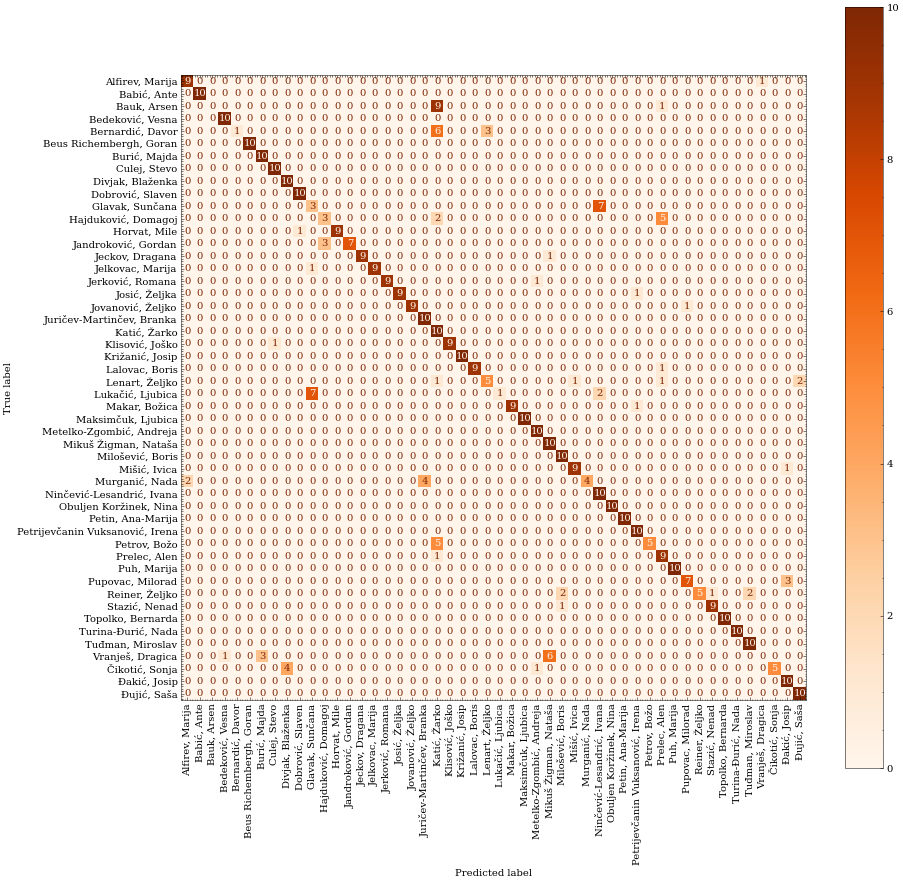

In [22]:
import matplotlib.pyplot as plt
plt.style.use("science no-latex".split())
from sklearn.metrics import ConfusionMatrixDisplay
fi, ax = plt.subplots(figsize=(14,14))
ConfusionMatrixDisplay.from_predictions(
   y_true, y_pred, cmap="Oranges", ax=ax, xticks_rotation=90)
plt.savefig("images/009_cm_speaker_id_test.png")
plt.savefig("images/009_cm_speaker_id_test.pdf")
plt.show()

In [23]:
print(df.loc[df.output_column=="Speaker_age_group", ["eval_file", "clip_seconds", "accuracy", "macroF1"]].groupby(["eval_file", "clip_seconds"]).mean().to_latex())

\begin{tabular}{llrr}
\toprule
                 &    &  accuracy &   macroF1 \\
eval\_file & clip\_seconds &           &           \\
\midrule
006\_age\_dev.csv & -1 &     0.704 &  0.695191 \\
006\_age\_test.csv & -1 &     0.694 &  0.689971 \\
\bottomrule
\end{tabular}



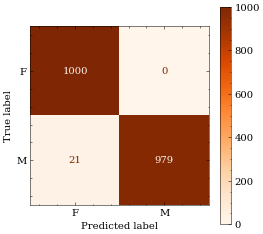

In [24]:
y_true, y_pred = df.loc[3, ["y_true", "y_pred"]]
import matplotlib.pyplot as plt
plt.style.use("science no-latex".split())
from sklearn.metrics import ConfusionMatrixDisplay
fi, ax = plt.subplots(figsize=(4,4))
ConfusionMatrixDisplay.from_predictions(
   y_true, y_pred, cmap="Oranges", ax=ax, xticks_rotation=0)
# plt.title("Speaker gender, test split\nAccuracy: 0.9895")
plt.savefig("images/009_cm_speaker_gender_test.png")
plt.savefig("images/009_cm_speaker_gender_test.pdf")
plt.show()

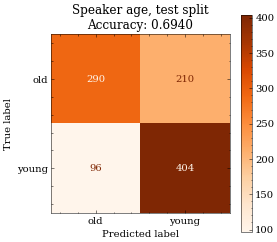

In [12]:
y_true, y_pred = df.loc[9, ["y_true", "y_pred"]]
import matplotlib.pyplot as plt
plt.style.use("science no-latex".split())
from sklearn.metrics import ConfusionMatrixDisplay
fi, ax = plt.subplots(figsize=(4,4))
ConfusionMatrixDisplay.from_predictions(
   y_true, y_pred, cmap="Oranges", ax=ax, xticks_rotation=0)
plt.title("Speaker age, test split\nAccuracy: 0.6940")
plt.savefig("images/009_cm_speaker_age_test.png")
plt.savefig("images/009_cm_speaker_age_test.pdf")
plt.show()

In [13]:
df.loc[9, :]

output_column                                         Speaker_age_group
model_name_or_path    models/facebook_wav2vec2-large-slavic-voxpopul...
eval_file                                              006_age_test.csv
clip_seconds                                                         -1
y_true                [old, old, old, old, old, old, old, old, old, ...
y_pred                [old, young, old, old, old, old, young, young,...
train_config          {'model_name_or_path': 'facebook/wav2vec2-larg...
accuracy                                                          0.694
macroF1                                                        0.689971
Name: 9, dtype: object

In [14]:
test = pd.read_csv(df.loc[9, "eval_file"])

test["y_pred"] = df.loc[9, "y_pred"]
test["y_true"] = df.loc[9, "y_true"]
test["missclassified"] = test.y_pred != test.y_true

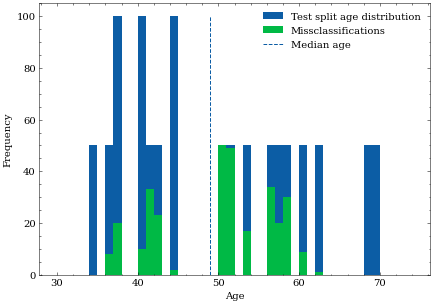

In [15]:
fig, ax = plt.subplots(figsize=(7, 5))
r = range(30, 75, 1)

test.Speaker_age_at_recording.plot.hist(bins=r, ax=ax, label="Test split age distribution")
test.Speaker_age_at_recording[test.missclassified].plot.hist(bins=r, ax=ax, label="Missclassifications")
ax.vlines(49, 0, 100, linestyles="dashed", label="Median age")
plt.legend()
plt.xlabel("Age")
# plt.title("Distribution of test age and missclassifications")

fname = "images/009_age_missclassifications_histogram"

plt.savefig(fname+".pdf")
plt.savefig(fname+".png")
plt.show()


In [ ]:
gb = test.groupby("Speaker_name").agg({
    "missclassified": lambda i: sum(i) / len(i),
    "Speaker_age_at_recording": "median"
    })

x = gb.Speaker_age_at_recording
y = gb.missclassified


fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x,y)
ax.vlines(49, 0, 1, linestyles="dashed", label="Median age")
ax.set_xlabel("Age")
plt.legend()
ax.set_title("Percentage of missclassifications per speaker vs their age")

fname = "images/009_age_missclassifications_percentages_scatter"

plt.savefig(fname+".pdf")
plt.savefig(fname+".png")
plt.show()


In [ ]:
test.columns

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
r = range(30, 75, 1)

test.Speaker_age_at_recording.plot.kde(
    # bins=r, 
    ax=ax, 
    label="Test split age distribution"
    )
test.Speaker_age_at_recording[test.missclassified].plot.kde(
    # bins=r, 
    ax=ax, 
    label="Missclassifications"
    )
ax.vlines(49, 0, 0.06, linestyles="dashed", label="Median age")
plt.legend()
plt.xlabel("Age")
plt.show()


In [ ]:
new_names = test.Speaker_name+" "+ test.Speaker_age_at_recording.astype(int).astype(str)
gb = test.assign(Speaker_name=new_names).groupby("Speaker_name").agg({
    "missclassified": lambda i: sum(i) / len(i),
    "Speaker_age_at_recording": "median"
    }).sort_values("Speaker_age_at_recording", ascending=True)
gb

x = gb.missclassified
y = gb.index


fig, ax = plt.subplots(figsize=(7, 5))

gb.missclassified.plot.barh(ax=ax)

plt.title("Age-sorted percentages of missclassifications")

fname = "images/009_age_missclassifications_percentages_by_speaker_barh"

plt.savefig(fname+".pdf")
plt.savefig(fname+".png")
plt.show()